# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration hypthese 2: The year the house was constructed has an influence on the selling price.
 * Additional variables are created or renamed and some graphical explorations are performed


##### Getting data and settings
###### Getting setting stored in 0_definitions.py file

In [2]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

##### Getting data stored at the end of EDA _4_cleaning.ipynb

In [3]:
df_eda = pd.read_csv("eda4.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)

##### Some extra variables for EDA

##### Changing data format and building time between house being sold and constructed
##### Difference of house construction/renovation and selling

In [ ]:
df_eda.info() 
df_eda["date_sold"] = pd.to_datetime(df_eda["date_sold"])
df_eda["yr_sold"]=df_eda["date_sold"].dt.year
# Difference
df_eda["sold_build_difference"]=(df_eda["yr_sold"]-df_eda["yr_built"]) 

##### Checking for correlation between year sold year constructed and their difference 

Text(70.7222222222222, 0.5, 'Features')

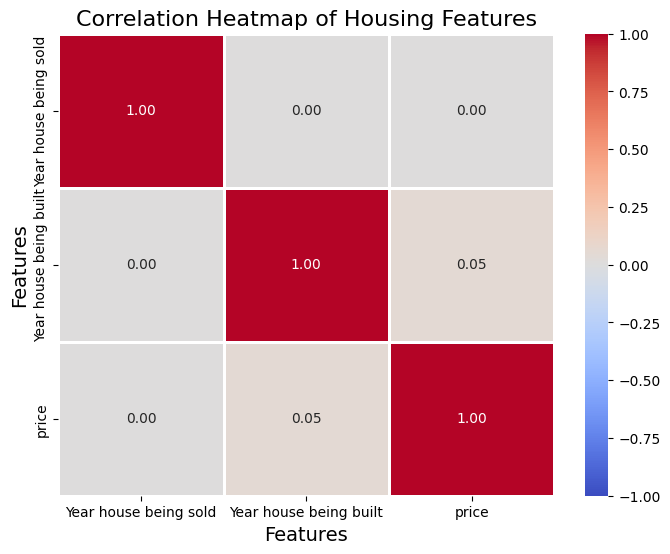

In [5]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

##### Keeping only rows where the house was not renovated (=yr_renovated): aims at checking for an intervening effect

In [6]:
# Number of rows before filtering
rows_before = len(df_eda)
df_eda = df_eda[df_eda['yr_renovated'] == 0]
# Number of rows after filtering
rows_after = len(df_eda)
rows_dropped = rows_before - rows_after 
rows_dropped 


632

##### Checking for correlation after renovation rows were deleted: between year sold year constructed and their difference 


Text(70.7222222222222, 0.5, 'Features')

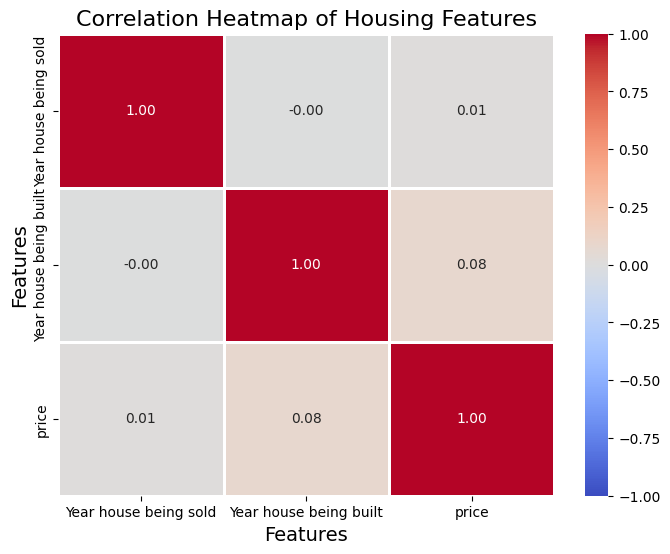

In [7]:
# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(8, 6), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

##### No changes: check for linearity by constructing ordinal variables

In [ ]:
df_eda['Year house being built'].describe()
df_eda.head()

In [9]:
### Check of linearity 
# Define bins and labels
bins = [1900, 1930, 1960, 1990, 2020]
labels = ['Between. 1900-1930', '1931-1960', '1961-1990', '1900-2015']
# Apply pd.cut to bin the data
df_eda['Year of counstruction'] = pd.cut(df_eda['Year house being built'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column

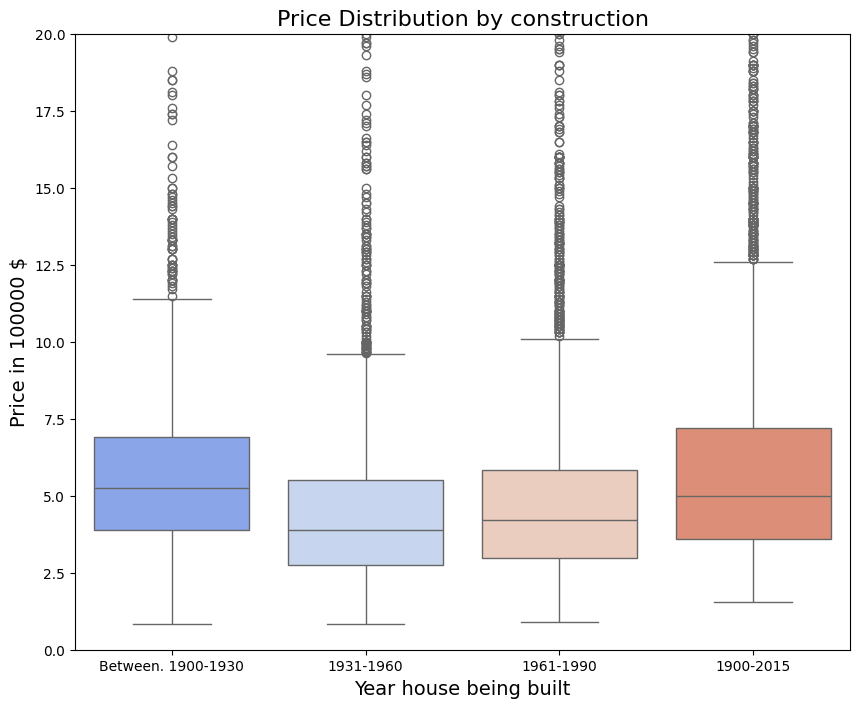

In [14]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='Year of counstruction',  # Binned categories
    y='price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by construction', fontsize=16)  # Title with larger font size
plt.xlabel('Year house being built', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000 $', fontsize=14)                                       # Y-axis label

plt.ylim(0, 20) 
plt.show()  # Display the boxplot

### Plotting for price and living area by year being build

In [ ]:

df_eda['Liv_areasqm']=(df_eda["sqft_living"]*0.092903)
df_eda.info()
df_eda.head()

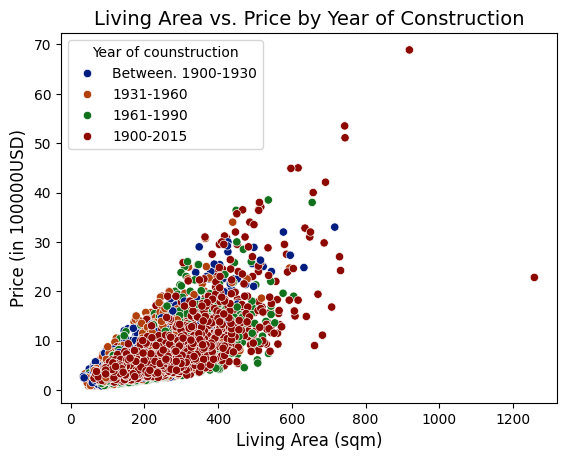

In [12]:

sns.scatterplot(data=df_eda, x='Liv_areasqm', y='price', 
                    hue='Year of counstruction', palette='dark')

# Adjust x-axis and y-axis labels
plt.xlabel('Living Area (sqm)', fontsize=12)
plt.ylabel('Price (in 100000USD)', fontsize=12)

# Optionally, adjust the plot title
plt.title('Living Area vs. Price by Year of Construction', fontsize=14)

# Show the plot
plt.show()

#### Saving data for next steps

In [13]:
df_eda.to_csv("eda5.csv")
 